In [1]:
# Establish the functionality for our assessment by bringing in the right packages
# Make sure to install these prior to mounting the packages 
# i.e. $ pip install pydotplus
# & visit http://www.graphviz.org/Download_macos.php

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pydotplus as pdot
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import train_test_split

%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Connect to the data source
df = pd.read_csv("/Users/JacobRaymond 1/Desktop/Ex_Files_Data_Science_of_Marketing/Exercise_Files/04_03/prediction-py.csv")

In [3]:
# Show column names for reference
df.columns

Index(['sales', 'sales_classification', 'capita', 'drive-by-traffic',
       'complimentary-establishments', 'competition', 'weather',
       'unemployment-rate', 'var1', 'var2', 'var3'],
      dtype='object')

In [4]:
# Set up our cross validation function

#Explanatory variables
feature_cols = ['capita', 'competition', 'weather', 'var1', 'var2', 'var3' ]

train_X, test_X, train_y, test_y = train_test_split( df[feature_cols],
                                    df['sales_classification'])

In [5]:
# Test different tree lenghts

depths_list = [2,3,4,5,6,7,8]

for depth in depths_list:
    clf_tree = DecisionTreeClassifier( max_depth = depth )
    clf_tree.fit( train_X, train_y )

In [6]:
# Specify the number of branches for our tree (essentially makes the previous step useless - algorithm will find best match))
clf_tree = DecisionTreeClassifier(max_depth=8)

In [7]:
# Fit our training data to the x and to the y
clf_tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=8)

In [8]:
# Apply our test data to our model 
tree_predict=clf_tree.predict(test_X)

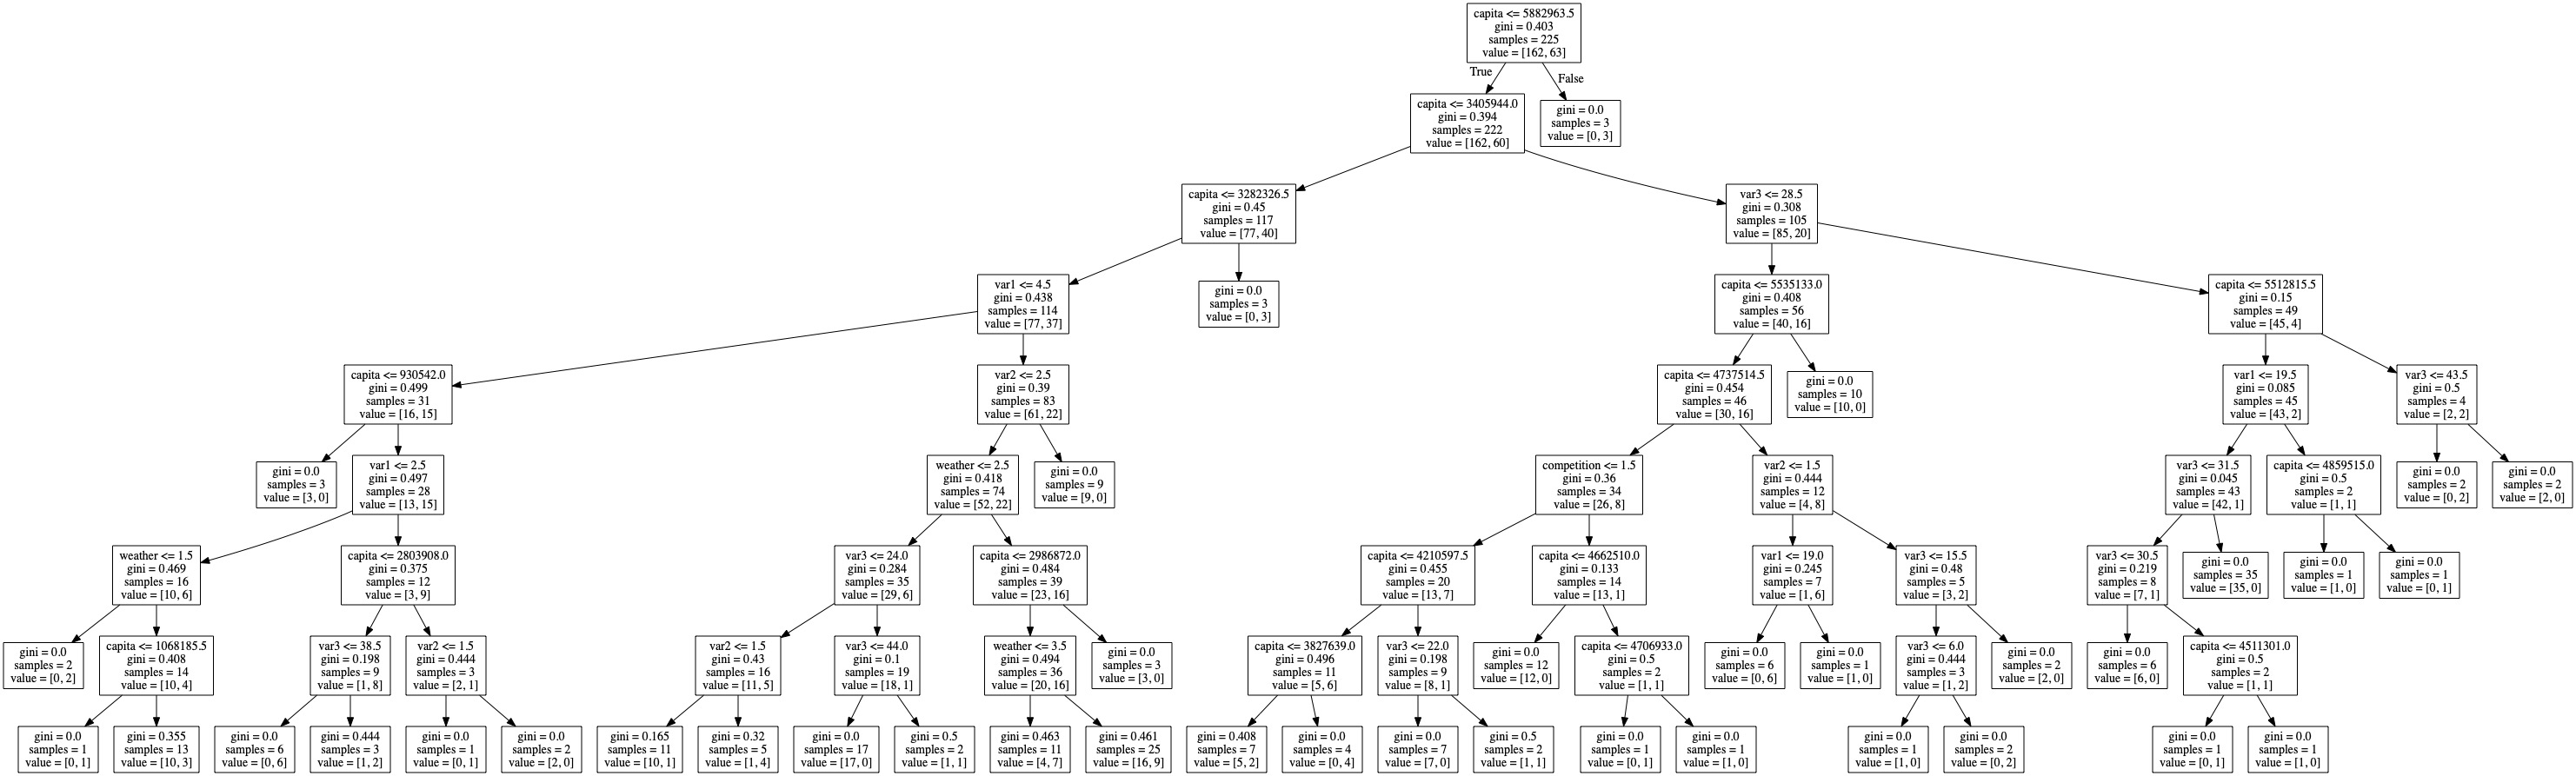

In [9]:
# Visualize our tree
export_graphviz( clf_tree,
                out_file = "model_tree.odt",
                feature_names = train_X.columns )
model_tree_graph = pdot.graphviz.graph_from_dot_file( 'model_tree.odt' )
model_tree_graph.write_jpg( 'model_tree.jpg' )

from IPython.display import Image
Image(filename='model_tree.jpg')